# Initial Data Exploration and Audit

In this Notebook, I made initial checks on the data. In addition to inspecting the data with Python in this Jupyter Notebook, I also loaded the data in TOPCAT (http://www.star.bris.ac.uk/~mbt/topcat/) which is an interactive graphical viewer and editor for tabular data. This is a relatively popular, freely available tool used by astronomers working with large data sets. I find it particularly useful for carrying out exploratroy data analysis for my work.

In [1]:
# Loading relevant Python packages and libraries
import pandas as pd
import os
import numpy as np
import seaborn as sns; sns.set()
sns.set_theme()
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
%matplotlib inline
from operator import attrgetter
import matplotlib.colors as mcolors
from prophet import Prophet

In [2]:
# Loading the provided CSV file as a Pandas DataFrame
data_raw = pd.read_csv("ecommerce_data.csv")

In [3]:
# Obtaining general information about columns and rows in the CSV file
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130000 entries, 0 to 129999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceDate    130000 non-null  object 
 1   InvoiceNo      130000 non-null  object 
 2   StockCode      6646 non-null    object 
 3   Description    3693 non-null    object 
 4   Quantity       10426 non-null   float64
 5   InvoiceDate.1  130000 non-null  object 
 6   UnitPrice      130000 non-null  float64
 7   CustomerID     125418 non-null  float64
 8   Country        130000 non-null  object 
 9   Estore_id      130000 non-null  int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 9.9+ MB


It can be seen from the output of the previous cell that we have 10 columns in the data. The invoice data column is repeated twice, so effectively we have 9 columns. For 5 of these columns (InvoiceDate, InvoiceNo, UnitPrice, Country, Estore_id), we have 130k rows.

The quantity column only has 10426 entries. Inspection with TOPCAT also reveals that the quantity column can have negative values. This will be addressed in subsequent cells. 

StockCode and Description columns have 6656 and 3693 rows of data, respectively. For CustomerID, there are 125418 entries. In the next cell, we convert the InvoiceDate Dtype to date.

In [4]:
data_raw['InvoiceDate'] =  pd.to_datetime(data_raw['InvoiceDate'], infer_datetime_format=True)

In [5]:
# Checking number of unique entries in each column
print(data_raw.nunique())
# Using the describe function to get some preliminary statistical information on the data
data_raw.describe().round()

InvoiceDate      7598
InvoiceNo        7837
StockCode        1992
Description      1537
Quantity          130
InvoiceDate.1    7598
UnitPrice         312
CustomerID       2598
Country            13
Estore_id          32
dtype: int64


,Quantity,UnitPrice,CustomerID,Estore_id
count,10426.0,130000.0,125418.0,130000.0
mean,11.0,5.0,13254.0,17.0
std,69.0,32.0,1363.0,9.0
min,-3167.0,0.0,12349.0,1.0
25%,1.0,1.0,12438.0,9.0
50%,4.0,2.0,12597.0,17.0
75%,12.0,4.0,13505.0,24.0
max,2400.0,4161.0,18287.0,32.0


From the output of the first line in the previous cell, it can be seen that we have data for 7837 unique invoices, 2598 unique customers from 13 countries. In total, we have 32 unique E-stores on the platform. The maximum unit price for a sold item was 4161. The maximum quantity of a sold item was 2400. The minimum quanity of returned items was -3167.

In the cells below, we will check the data for negative quanitiy values. I am assuming that these entries are returns/refunds. In the cell below, I find the number of rows in which the quantity column has a negative value (less than 0).

In [6]:
data_raw[data_raw['Quantity']<0]

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,InvoiceDate.1,UnitPrice,CustomerID,Country,Estore_id
0,2010-12-09 15:43:00,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1.0,2010-12-09 15:43:00,2.95,15329.0,United Kingdom,20
72,2011-05-17 15:24:00,C553536,NaN,NaN,-2.0,2011-05-17 15:24:00,8.15,14051.0,United Kingdom,15
175,2011-02-22 14:56:00,C544665,NaN,NaN,-2.0,2011-02-22 14:56:00,2.95,12852.0,United Kingdom,11
332,2011-03-14 12:19:00,C546511,22801,ANTIQUE GLASS PEDESTAL BOWL,-1.0,2011-03-14 12:19:00,3.75,12921.0,United Kingdom,3
426,2010-12-09 15:13:00,C538103,NaN,NaN,-2.0,2010-12-09 15:13:00,8.50,17442.0,United Kingdom,23
...,...,...,...,...,...,...,...,...,...,...
119343,2011-11-23 12:29:00,C578239,NaN,NaN,-1.0,2011-11-23 12:29:00,26.33,14912.0,Italy,31
119446,2011-03-14 11:45:00,C546501,NaN,SET OF 3 CAKE TINS PANTRY DESIGN,-2.0,2011-03-14 11:45:00,4.95,12584.0,Italy,14
119686,2011-03-14 11:45:00,C546501,NaN,SET OF 3 CAKE TINS PANTRY DESIGN,-2.0,2011-03-14 11:45:00,4.95,12584.0,Italy,31
119864,2011-11-30 16:37:00,C579864,NaN,NaN,-9.0,2011-11-30 16:37:00,9.95,12584.0,Italy,19


We can see from the output of the previous cell that we have 943 rows in which the quantity column has a negative value. Looking at the output above and sorting the data in ascending order of quantiy in TOPCAT revelaed that most of these negative quantity entries had Invoice No values that began with the letter "C". Below, I check whether all negative quantity values have invoice numbers that begin with C.

In [7]:
data_raw[(data_raw['InvoiceNo'].str.startswith('C')) & (data_raw['Quantity']<0)]

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,InvoiceDate.1,UnitPrice,CustomerID,Country,Estore_id
0,2010-12-09 15:43:00,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1.0,2010-12-09 15:43:00,2.95,15329.0,United Kingdom,20
72,2011-05-17 15:24:00,C553536,NaN,NaN,-2.0,2011-05-17 15:24:00,8.15,14051.0,United Kingdom,15
175,2011-02-22 14:56:00,C544665,NaN,NaN,-2.0,2011-02-22 14:56:00,2.95,12852.0,United Kingdom,11
332,2011-03-14 12:19:00,C546511,22801,ANTIQUE GLASS PEDESTAL BOWL,-1.0,2011-03-14 12:19:00,3.75,12921.0,United Kingdom,3
426,2010-12-09 15:13:00,C538103,NaN,NaN,-2.0,2010-12-09 15:13:00,8.50,17442.0,United Kingdom,23
...,...,...,...,...,...,...,...,...,...,...
119343,2011-11-23 12:29:00,C578239,NaN,NaN,-1.0,2011-11-23 12:29:00,26.33,14912.0,Italy,31
119446,2011-03-14 11:45:00,C546501,NaN,SET OF 3 CAKE TINS PANTRY DESIGN,-2.0,2011-03-14 11:45:00,4.95,12584.0,Italy,14
119686,2011-03-14 11:45:00,C546501,NaN,SET OF 3 CAKE TINS PANTRY DESIGN,-2.0,2011-03-14 11:45:00,4.95,12584.0,Italy,31
119864,2011-11-30 16:37:00,C579864,NaN,NaN,-9.0,2011-11-30 16:37:00,9.95,12584.0,Italy,19


From the output above, we can see that there are 21 rows that have negative quantity value but do not have an invoice no that begins with C. We can filter out the data for the returns/refunds using the negative quantity condition and save it to the frame data_negative_quantity:

In [8]:
data_negative_quantity = data_raw[data_raw['Quantity']<0]
# checking number of unique entries in negative quantity data below
print(data_negative_quantity.nunique())

InvoiceDate      352
InvoiceNo        352
StockCode        174
Description      126
Quantity          41
InvoiceDate.1    352
UnitPrice         87
CustomerID       212
Country           12
Estore_id         32
dtype: int64


<b>In our initial data (data_raw), the quantity column only has a given value in 10426 rows. For the other 119574 rows, the quantity column has a NaN value.  Here, I will assume that the quantity value is '1' in all these rows. In the following cell, I will replace all NaN values in the quantity field with in 1</b>

In [9]:
data_raw["Quantity"] = data_raw["Quantity"].fillna(1)

Now we can define a dataframe in which all quantity values are positive

In [10]:
data_positive_quantity = data_raw[data_raw['Quantity']>0].copy()
data_positive_quantity

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,InvoiceDate.1,UnitPrice,CustomerID,Country,Estore_id
1,2011-12-09 09:07:00,581480,23355,HOT WATER BOTTLE KEEP CALM,12.0,2011-12-09 09:07:00,4.95,14441.0,United Kingdom,20
2,2011-12-07 12:55:00,581132,NaN,NaN,4.0,2011-12-07 12:55:00,4.95,17590.0,United Kingdom,1
3,2011-06-23 14:11:00,557892,NaN,NaN,2.0,2011-06-23 14:11:00,6.35,14534.0,United Kingdom,17
4,2011-01-25 14:01:00,542115,84992,NaN,1.0,2011-01-25 14:01:00,2.08,NaN,United Kingdom,6
5,2011-12-01 11:51:00,580024,35964,NaN,36.0,2011-12-01 11:51:00,0.39,15172.0,United Kingdom,32
...,...,...,...,...,...,...,...,...,...,...
129995,2011-09-13 11:12:00,566494,NaN,NaN,1.0,2011-09-13 11:12:00,2.08,17404.0,Sweden,32
129996,2011-11-14 08:22:00,576083,NaN,NaN,1.0,2011-11-14 08:22:00,5.95,17404.0,Sweden,12
129997,2011-11-18 16:17:00,C577363,NaN,NaN,1.0,2011-11-18 16:17:00,2.89,12697.0,Sweden,16
129998,2011-05-12 12:36:00,552957,NaN,NaN,1.0,2011-05-12 12:36:00,0.85,17404.0,Sweden,17


In [11]:
# Defining a new column in which we multiply 'Quantity' column with the 'Unit Price' column,
# we will call this column 'TotalPrice'

data_positive_quantity["TotalPrice"] = data_positive_quantity["Quantity"]*data_positive_quantity["UnitPrice"]

In [12]:
data_positive_quantity[data_positive_quantity['InvoiceNo'].str.startswith('C')]

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,InvoiceDate.1,UnitPrice,CustomerID,Country,Estore_id,TotalPrice
271,2010-12-01 10:24:00,C536391,21980,NaN,1.0,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,17,0.29
443,2011-01-19 12:47:00,C541573,22778,NaN,1.0,2011-01-19 12:47:00,3.39,15311.0,United Kingdom,24,3.39
1268,2011-03-17 14:24:00,C546858,22839,NaN,1.0,2011-03-17 14:24:00,14.95,14081.0,United Kingdom,10,14.95
1428,2011-11-13 11:38:00,C575940,23266,SET OF 3 WOODEN STOCKING DECORATION,1.0,2011-11-13 11:38:00,1.25,17838.0,United Kingdom,30,1.25
2381,2011-09-22 15:17:00,C567885,NaN,ROSES REGENCY TEACUP AND SAUCER,1.0,2011-09-22 15:17:00,2.95,12879.0,United Kingdom,17,2.95
...,...,...,...,...,...,...,...,...,...,...,...
129904,2010-12-14 13:27:00,C538847,NaN,NaN,1.0,2010-12-14 13:27:00,4.95,17404.0,Sweden,16,4.95
129914,2011-11-18 16:17:00,C577363,NaN,NaN,1.0,2011-11-18 16:17:00,2.89,12697.0,Sweden,25,2.89
129957,2011-12-05 16:26:00,C580702,NaN,NaN,1.0,2011-12-05 16:26:00,5.95,17404.0,Sweden,26,5.95
129997,2011-11-18 16:17:00,C577363,NaN,NaN,1.0,2011-11-18 16:17:00,2.89,12697.0,Sweden,16,2.89


There are 2374 columns that have invoice numbers that begin with C. Given that 98% of all negative quantity numbers began with C and that no C invoices have a positive quanity value, we can assume that these are returns/cancelled/refunded orders and filter them out from the data set. In the following set:

In [13]:
data_positive_quantity = data_positive_quantity[~ data_positive_quantity['InvoiceNo'].str.startswith('C')]

I also noticed that there are entries with 'manual' written in the description column when inspecting the data. To see those entries, I checked:

In [14]:
data_positive_quantity[data_positive_quantity['Description'].fillna('').str.lower().str.contains('manual')]

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,InvoiceDate.1,UnitPrice,CustomerID,Country,Estore_id,TotalPrice
340,2011-02-09 15:33:00,543543,M,Manual,1.0,2011-02-09 15:33:00,2.95,17843.0,United Kingdom,23,2.95
1071,2011-07-06 11:22:00,559107,M,Manual,1.0,2011-07-06 11:22:00,2.95,15334.0,United Kingdom,27,2.95
2855,2011-08-01 11:44:00,561916,NaN,Manual,1.0,2011-08-01 11:44:00,0.00,15581.0,United Kingdom,11,0.00
7360,2011-04-12 09:35:00,549739,M,Manual,1.0,2011-04-12 09:35:00,308.82,15935.0,United Kingdom,26,308.82
7626,2011-03-31 16:19:00,548515,M,Manual,3.0,2011-03-31 16:19:00,0.65,NaN,United Kingdom,29,1.95
13326,2011-11-18 10:42:00,577168,M,Manual,1.0,2011-11-18 10:42:00,0.00,12603.0,Germany,12,0.00
17375,2011-07-04 15:54:00,558895,M,Manual,1.0,2011-07-04 15:54:00,389.68,12619.0,Germany,13,389.68
25700,2011-10-27 14:20:00,573080,M,Manual,1.0,2011-10-27 14:20:00,4161.06,12536.0,France,17,4161.06
30564,2011-06-20 11:00:00,557377,M,Manual,1.0,2011-06-20 11:00:00,1917.00,NaN,EIRE,23,1917.00
30968,2011-06-20 11:00:00,557377,M,Manual,1.0,2011-06-20 11:00:00,1917.00,NaN,EIRE,18,1917.00


The rows described as Manual which tend to have StockCode value of M. However, they are only a few of these rows (see next cell) compared to the data and therefore, I kept them in the data_positive_quantity frame

In [15]:
data_positive_quantity[data_positive_quantity['StockCode']=="M"]

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,InvoiceDate.1,UnitPrice,CustomerID,Country,Estore_id,TotalPrice
340,2011-02-09 15:33:00,543543,M,Manual,1.0,2011-02-09 15:33:00,2.95,17843.0,United Kingdom,23,2.95
1071,2011-07-06 11:22:00,559107,M,Manual,1.0,2011-07-06 11:22:00,2.95,15334.0,United Kingdom,27,2.95
7360,2011-04-12 09:35:00,549739,M,Manual,1.0,2011-04-12 09:35:00,308.82,15935.0,United Kingdom,26,308.82
7626,2011-03-31 16:19:00,548515,M,Manual,3.0,2011-03-31 16:19:00,0.65,NaN,United Kingdom,29,1.95
9203,2010-12-15 16:38:00,539056,M,NaN,1.0,2010-12-15 16:38:00,1.45,16725.0,United Kingdom,24,1.45
13326,2011-11-18 10:42:00,577168,M,Manual,1.0,2011-11-18 10:42:00,0.00,12603.0,Germany,12,0.00
17375,2011-07-04 15:54:00,558895,M,Manual,1.0,2011-07-04 15:54:00,389.68,12619.0,Germany,13,389.68
20606,2011-04-05 09:45:00,548913,M,NaN,1.0,2011-04-05 09:45:00,1136.30,12669.0,France,19,1136.30
25700,2011-10-27 14:20:00,573080,M,Manual,1.0,2011-10-27 14:20:00,4161.06,12536.0,France,17,4161.06
30564,2011-06-20 11:00:00,557377,M,Manual,1.0,2011-06-20 11:00:00,1917.00,NaN,EIRE,23,1917.00


In [16]:
# Here I check the number of unique values of columns in data_positive_quantity:
print(data_positive_quantity.nunique())

InvoiceDate      7114
InvoiceNo        7329
StockCode        1945
Description      1506
Quantity           89
InvoiceDate.1    7114
UnitPrice         297
CustomerID       2575
Country            13
Estore_id          32
TotalPrice       1010
dtype: int64


In [17]:
# here, I group the data according to Estores and check how many unique invoices they can be found on.
data_positive_quantity.groupby(["Estore_id"]).nunique()

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,InvoiceDate.1,UnitPrice,CustomerID,Country,TotalPrice
Estore_id,,,,,,,,,,
1,1257,1267,159,82,31,1257,128,445,13,239
2,1253,1268,178,104,31,1253,124,444,13,249
3,1277,1289,171,106,27,1277,131,477,13,263
4,1263,1270,167,92,28,1263,131,467,13,251
5,1306,1316,181,121,27,1306,130,499,13,244
6,1232,1239,167,98,33,1232,125,456,13,245
7,1306,1315,190,114,29,1306,126,479,13,231
8,1289,1297,178,113,29,1289,133,477,13,250
9,1295,1302,185,108,29,1295,129,482,13,244


From the table above, it can be seen that all of the e-stores feature on different transactions. We can also check to see how many E-stores feature on a typical invoice:

In [18]:
# grouping the data by Invoice No and checking stars for unqiue values
data_positive_quantity.groupby(["InvoiceNo"]).nunique().describe()

,InvoiceDate,StockCode,Description,Quantity,InvoiceDate.1,UnitPrice,CustomerID,Country,Estore_id,TotalPrice
count,7329.000000,7329.000000,7329.000000,7329.000000,7329.000000,7329.000000,7329.000000,7329.0,7329.000000,7329.000000
mean,1.001501,0.800109,0.463638,1.275208,1.001501,3.341111,0.896848,1.0,5.579479,3.386001
std,0.038715,1.014776,0.714647,0.754346,0.038715,4.487021,0.304178,0.0,8.670820,4.510163
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.0,1.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.0,4.000000,3.000000
max,2.000000,12.000000,11.000000,10.000000,2.000000,40.000000,1.000000,1.0,32.000000,40.000000


The mean number of E-stores that a person orders from using the Estore_id is about 5.5. However, this is influenced by outliers and we can see that the median value is 1, which suggests that majority of the time an order is placed from a single E-store. Let's look at this further in the subsequent cells.

<AxesSubplot:>

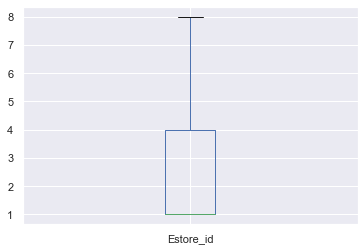

In [19]:
# box plot showing the distribtion of 25%, 50%, 75% values for the number of unqiue Estore in a given order
data_positive_quantity.groupby(["InvoiceNo"]).nunique()['Estore_id'].plot(kind='box',showfliers=False)

In [20]:
# creating a data set grouped by the number of unique Invoice No:
data_grouped_invoices = data_positive_quantity.groupby(["InvoiceNo"]).nunique()

In [21]:
# checking number of unique orders in which products were ordered from more than 1 Estore:
data_grouped_invoices[data_grouped_invoices['Estore_id']>1]

,InvoiceDate,StockCode,Description,Quantity,InvoiceDate.1,UnitPrice,CustomerID,Country,Estore_id,TotalPrice
InvoiceNo,,,,,,,,,,
536370,1,0,0,1,1,9,1,1,23,9
536389,1,0,0,1,1,9,1,1,30,9
536403,1,0,0,2,1,2,1,1,8,2
536408,1,2,0,2,1,2,1,1,2,2
536412,1,3,0,1,1,3,1,1,3,3
...,...,...,...,...,...,...,...,...,...,...
581498,1,0,0,2,1,5,0,1,5,5
581570,1,0,0,1,1,6,1,1,12,6
581574,1,0,0,1,1,7,1,1,11,7


In 3561 orders, the customer ordered from more than 1 E-store.

In [22]:
# checking number of unique orders in which products were ordered from only 1 E-store
data_grouped_invoices[data_grouped_invoices['Estore_id']==1]


,InvoiceDate,StockCode,Description,Quantity,InvoiceDate.1,UnitPrice,CustomerID,Country,Estore_id,TotalPrice
InvoiceNo,,,,,,,,,,
536373,1,0,1,1,1,1,1,1,1,1
536392,1,0,1,1,1,1,1,1,1,1
536400,1,1,1,1,1,1,1,1,1,1
536401,1,0,0,1,1,1,1,1,1,1
536406,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
581478,1,1,0,1,1,1,1,1,1,1
581480,1,1,1,1,1,1,1,1,1,1
581495,1,1,1,1,1,1,1,1,1,1


For 3768 orders, the customer ordered from 1 E-store.

Next, I use the data to check the number of unique invoices with time and to make a plot of number of orders per week.

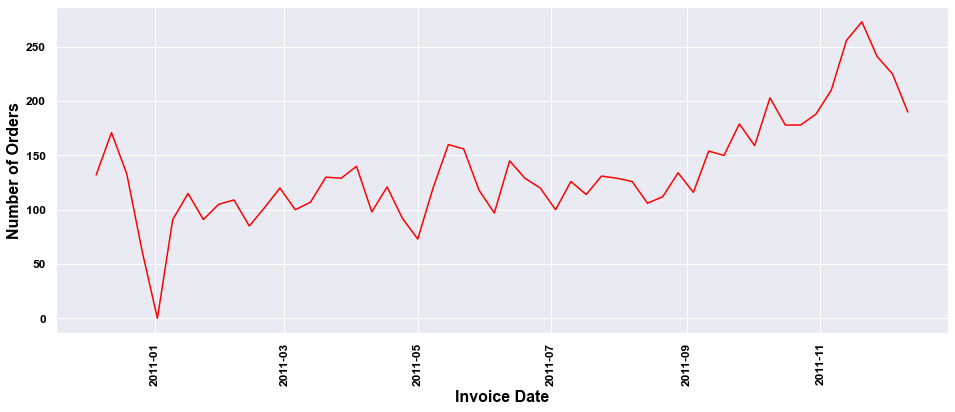

In [23]:
# Using Invoice Date to group data and aggregating the number of unique InvoiceNo in each week
df1 = data_positive_quantity.groupby(pd.Grouper(freq='W', key='InvoiceDate')).agg({"InvoiceNo": "nunique"})
plt.figure(figsize=(16, 6))
plt.plot(df1, color='red')
plt.xticks(rotation='vertical', fontsize=12, fontweight='bold', color = 'black')
plt.xlabel('Invoice Date', fontweight='bold', color = 'black', fontsize='16', horizontalalignment='center')
plt.ylabel('Number of Orders', fontweight='bold', color = 'black', fontsize='16', horizontalalignment='center')
plt.yticks(fontsize=12, fontweight='bold', color = 'black')
plt.show()

From the inspection of the InvoiceDate and the figure above, it can be seen that we have about one year worth of sale data starting from Dec 2010 to Dec 2011.

In [24]:
# checking the initial data to see how country data for customers is distributed
print(data_raw['Country'].value_counts())

Norway            10000
Australia         10000
United Kingdom    10000
Portugal          10000
Sweden            10000
Belgium           10000
Switzerland       10000
Netherlands       10000
EIRE              10000
France            10000
Italy             10000
Spain             10000
Germany           10000
Name: Country, dtype: int64


In the initial data, each of the 13 countries has 10000 entries. After removing the return orders these numbers change but not too significantly (see next cell).

In [25]:
print(data_positive_quantity['Country'].value_counts())

Netherlands       9961
Norway            9885
Portugal          9875
United Kingdom    9835
Belgium           9834
France            9831
Spain             9825
Switzerland       9820
Sweden            9760
EIRE              9641
Germany           9543
Italy             9453
Australia         9420
Name: Country, dtype: int64


We can also find the number of orders placed by each customer by grouping the data set according to the unique number of customers and the InvoiceNo

In [26]:
number_of_orders = data_positive_quantity.groupby(['CustomerID'])['InvoiceNo'].nunique()
number_of_orders

CustomerID
12349.0    1
12350.0    1
12352.0    8
12354.0    1
12356.0    3
          ..
18265.0    1
18272.0    2
18280.0    1
18283.0    7
18287.0    3
Name: InvoiceNo, Length: 2575, dtype: int64

We have a total of 2575 unique customers. We can also estimate what percentage of these customers ordered more than once

In [27]:
# Summing up the number of multiple ordering customers and dividing by the number of unique customers

multiple_order_percentage = np.sum(number_of_orders > 1) / data_positive_quantity['CustomerID'].nunique()
print(100 * multiple_order_percentage)

48.077669902912625


It can be seen from the cell above that 48% of the customers have ordered more than once.

We can also check, which E-store gets how many repeat customers. In the following cell we group by Estore_id and CustomerID and the unique number of Invoices 

In [28]:
estore_repeat_order = data_positive_quantity.groupby(['Estore_id','CustomerID'])['InvoiceNo'].nunique().reset_index()


In [29]:
# given an E-store ID, we can identify customers that placed more than 1
# below, I check how many repeat customers did Estore_ID(1) have
estore_repeat_order.query('Estore_id ==1 & InvoiceNo>1')

,Estore_id,CustomerID,InvoiceNo
2,1,12352.0,7
4,1,12356.0,2
7,1,12362.0,10
8,1,12364.0,3
10,1,12377.0,2
...,...,...,...
374,1,16321.0,2
397,1,17097.0,6
408,1,17404.0,13
420,1,17728.0,2


We can see that estore 1 had 172 repeat customers. We can also see the distribution for the number of repeat orders with Estore with id 1.

In [30]:
# Making a histogram showing the number of repeat orders by customers

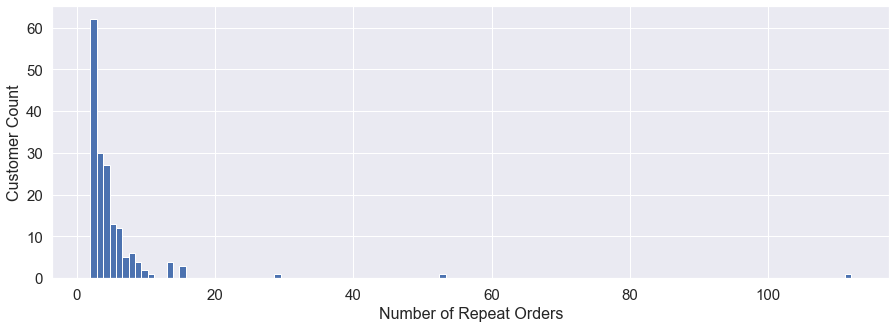

In [31]:
axarr = estore_repeat_order.query('Estore_id ==1 & InvoiceNo>1').hist(column='InvoiceNo',bins=120,figsize=(15,5))
for ax in axarr.flatten():
    ax.set_xlabel("Number of Repeat Orders",fontsize=16)
    ax.set_ylabel("Customer Count",fontsize=16)
    ax.set_title("")
    ax.tick_params(axis="x", labelsize=15)
    ax.tick_params(axis="y", labelsize=15)
    

We can see from the histogram above that a little more than 60 of the 172 repeat customers for E_store with ID 1 place 2 orders. One customer even placed, 120 orders. Several customers orders 3 to 10 times and few even ordered more than 20 times.

In the next cells, we make plots to see how the orders are distributed for the different Estore IDs. We also plot distribution of returned/cancelled orders that were excluded from data_positive_quantity. In addition to that, we use all the data to estimate total sales and show how they are distributed

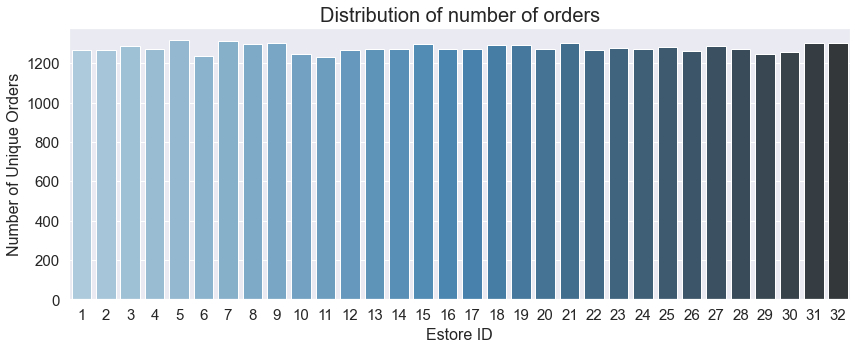

In [32]:
# Using seaborn to plot distribution of number of orders for each E-store

nu = data_positive_quantity.groupby(["Estore_id"]).nunique().reset_index()
nu = nu[['Estore_id','InvoiceNo']]
plt.figure(figsize=(14,5))
ax = sns.barplot(x='Estore_id', y='InvoiceNo', data=nu, palette="Blues_d")
ax.set_title("Distribution of number of orders", size=20)
ax.set_xlabel("Estore ID", size=16)
ax.set_ylabel("Number of Unique Orders", size=16)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)

In [33]:
# Redefining data_negative_quantity to include all the rows that we excluded from data_positive_quantity
data_negative_quantity = data_raw[(data_raw['Quantity']<0) | (data_raw['InvoiceNo'].str.startswith('C'))]

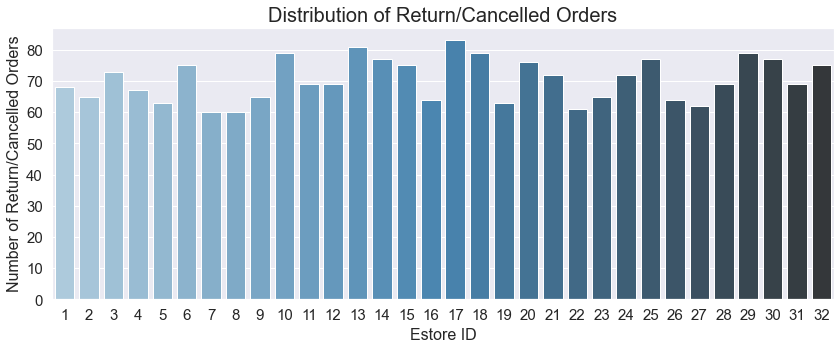

In [34]:
# Showing distribution of return or cancelled orders

nu = data_negative_quantity.groupby(["Estore_id"]).nunique().reset_index()
nu = nu[['Estore_id','InvoiceNo']]
plt.figure(figsize=(14,5))
ax = sns.barplot(x='Estore_id', y='InvoiceNo', data=nu, palette="Blues_d")
ax.set_title("Distribution of Return/Cancelled Orders", size=20)
ax.set_xlabel("Estore ID", size=16)
ax.set_ylabel("Number of Return/Cancelled Orders", size=16)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)

In [35]:
print(data_negative_quantity.nunique())

InvoiceDate      507
InvoiceNo        508
StockCode        225
Description      147
Quantity          42
InvoiceDate.1    507
UnitPrice        109
CustomerID       264
Country           13
Estore_id         32
dtype: int64


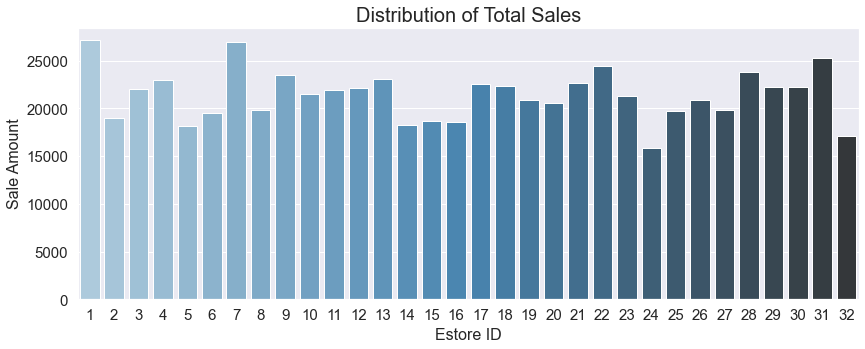

In [36]:
#Checking how sales are distributed for each E-store. Here we include data for returned/cancelled orders
data_raw["TotalPrice"] = data_raw["Quantity"]*data_raw["UnitPrice"]

nu = data_raw.groupby(["Estore_id"]).sum().reset_index()
nu = nu[['Estore_id','TotalPrice']]
plt.figure(figsize=(14,5))
ax = sns.barplot(x='Estore_id', y='TotalPrice', data=nu, palette="Blues_d")
ax.set_title("Distribution of Total Sales", size=20)
ax.set_xlabel("Estore ID", size=16)
ax.set_ylabel("Sale Amount", size=16)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)

In [37]:
data_raw.groupby(["Estore_id"]).sum().describe

<bound method NDFrame.describe of            Quantity  UnitPrice  CustomerID  TotalPrice
Estore_id                                             
1            9677.0   18144.78  50986949.0    27118.77
2            6847.0   15957.30  50549674.0    18976.43
3            6685.0   19066.82  52544539.0    22070.12
4            7775.0   20705.34  53574656.0    22929.46
5            6831.0   20122.34  52584255.0    18170.09
6           10512.0   19066.92  51024705.0    19492.06
7            9601.0   18225.86  51676589.0    26974.68
8            8890.0   18929.52  51420948.0    19798.71
9            7239.0   19164.35  52948611.0    23504.54
10           6788.0   16350.87  51140618.0    21455.77
11           5836.0   19916.50  51007302.0    21925.56
12           7525.0   23925.66  52419953.0    22137.80
13           8196.0   17464.29  52147611.0    23042.02
14           6709.0   17659.28  51712578.0    18310.56
15           6796.0   20256.64  52409593.0    18683.02
16           6740.0   14398.08 

In [38]:
# Saving filtered data frames to CSV files:
data_positive_quantity.to_csv('data_positive_quantity.csv')
data_negative_quantity.to_csv('data_negative_quantity.csv')